In [2]:
use "../3_output/regression_analysis_ind_with_ent_sent_june2020.dta", clear

## make labels and create demeaned vars

In [3]:
egen mean_ent_others = mean(ent_others)
gen ent_others_demean=ent_others-mean_ent_others



(2,773 missing values generated)


In [4]:
egen mean_ent_self = mean(ent_self)
gen ent_self_demean=ent_self-mean_ent_self



(2,773 missing values generated)


In [5]:
egen mean_avg_v2=mean(avg_v2)
gen avg_v2_demean=avg_v2-mean_avg_v2

In [6]:
egen mean_avgmean_others=mean(avgmean_others)
gen avgmean_others_demean=avgmean_others-mean_avgmean_others



(1,479 missing values generated)


In [7]:
gen ent_others_sq=ent_others*ent_others
gen ent_self_demean_sq=ent_self_demean*ent_self_demean


(2,773 missing values generated)

(2,773 missing values generated)


In [8]:

label variable ent_self_demean "Rating_Entropy_Self"
label variable ent_self "Rating_Entropy_Self"
label variable ent_others_demean "Rating_Entropy_Others"
label variable ent_others "Rating_Entropy_Others"
label variable avg_v2_demean "Average_Rating_Self"
label variable avg_v2 "Average_Rating_Self"
label variable avgmean_others_demean "Average_Rating_Others"
label variable avgmean_others "Average_Rating_Others"
label variable reviews_ct "Review_Count"
label variable log_experience "Experience"
label variable temp_own_price_diff_other "Price_Difference"
label variable log_zip_rev "Market_LogRevenue"
label variable ent_others_sq  "Rating_Entropy_Others^2"
label variable ent_self_demean_sq "Rating_Entropy_Self^2"
label variable log_quotes "Installer Activity Level"

In [9]:
su avg_sent_score


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~e |      8,113    .4171853      .35676     -.8268      .9576


In [10]:
su avg_sent*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
avg_sent_s~e |      8,113    .4171853      .35676     -.8268      .9576
avg_sent_s~t |      8,113    .5971259    .2507234          0    .886075
avg_sent_s~s |      8,113    .5662764    .2792114     -.5994      .9576


In [11]:
gen avg_sent_score_demean=avg_sent_score-.4119695
label variable avg_sent_score_demean "Average_Sentiment_Self"
gen avg_sent_score_others_demean=avg_sent_score_others- .5615071
label variable avg_sent_score_others_demean "Average_Sentiment_Others"
gen text_d_self_p50_demean=text_d_self_p50-0.0635868
label variable text_d_self_p50_demean  "Text-based_Entropy_Self"
gen text_d_others_p50_demean=text_d_others_p50-0.1245589
label variable text_d_others_p50_demean "Text-based_Entropy_Others"






(4,113 missing values generated)


(1,535 missing values generated)



## Subsetting observations used for the model 

In [17]:
xtset

       panel variable:  installer_id (unbalanced)
        time variable:  year_month_~t, 1 to 64
                delta:  1 unit


In [28]:
codebook installer_id


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
installer_id                                                                                                                                                                                                                                        (unlabeled)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (int)

                 range:  [363,23027]                  units:  1
         unique values:  364                      missing .:  0/5,340

                  mean:   18516.3
              std. de

In [25]:
su reviews_ct,d


                        Review_Count
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            1              0       Obs               5,340
25%            1              0       Sum of Wgt.       5,340

50%            3                      Mean            5.16161
                        Largest       Std. Dev.      6.484259
75%            6             48
90%           12             48       Variance       42.04561
95%           19             51       Skewness       2.652859
99%           32             52       Kurtosis       11.56258


In [30]:
codebook installer_id if reviews_ct>3


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
installer_id                                                                                                                                                                                                                                        (unlabeled)
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (int)

                 range:  [363,22992]                  units:  1
         unique values:  186                      missing .:  0/2,287

                  mean:   18779.4
              std. de

In [31]:
su ent*


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
     ent_mkt |      5,340    .2376226    .1857222          0    1.05492
  ent_others |      5,340    .2247373    .1915538          0   1.070593
    ent_self |      5,340    .0981426    .2199734          0   1.209574
ent_others~n |      5,340    2.79e-09    .1915538  -.2247373   .8458561
ent_self_d~n |      5,340   -1.38e-09    .2199734  -.0981426   1.111431
-------------+---------------------------------------------------------
ent_others~q |      5,340    .0871928    .1348904          0    1.14617
ent_self_d~q |      5,340    .0483792    .1159573   .0001067    1.23528


In [32]:
xtset

       panel variable:  installer_id (unbalanced)
        time variable:  year_month_~t, 7 to 64
                delta:  1 unit


## Simply subset to high-reviews_ct obs

In [34]:
global iv_0_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_11_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean c.ent_others_demean#c.ent_others_demean  log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_12_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean ent_self_demean  c.ent_others_demean#c.ent_others_demean  c.ent_self_demean#c.ent_self_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  

eststo clear 

drop if ent_others_demean==.


qui:areg f.log_quotes  $iv_0_demean  , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes $iv_11_demean    , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_12_demean  , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_0_demean if reviews_ct>=3 , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes $iv_11_demean if reviews_ct>=3   , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_12_demean if reviews_ct>=3 , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_0_demean if reviews_ct>=5 , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes $iv_11_demean if reviews_ct>=5  , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_12_demean if reviews_ct>=5 , absorb( installer_id) vce(robust)
eststo
esttab est1 est2 est3 est4 est5 est6 ,  order(  ent_self* c.ent_self* ent_other* c.ent_other* avg_v2_demean avgmean_others_demean) drop(*state* missing* ) p  label  scalars(r2 aic bic)
esttab est1 est2 est3 est7 est8 est9 ,  order(  ent_self* c.ent_self* ent_other* c.ent_other* avg_v2_demean avgmean_others_demean) drop(*state* missing* ) p  label  scalars(r2 aic bic)
 






(0 observations deleted)


(est1 stored)


(est2 stored)


(est3 stored)


(est4 stored)


(est5 stored)


(est6 stored)


(est7 stored)


(est8 stored)


(est9 stored)


--------------------------------------------------------------------------------------------------------------------
                              (1)             (2)             (3)             (4)             (5)             (6)   
                     F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l   
--------------------------------------------------------------------------------------------------------------------
Rating_Entropy_Self                                         0.936*                                          0.865   
                                                          (0.011)                                         (0.087)   

Rating_Entropy_Sel~t                                       -1.301*                                         -0.904   
    

In [35]:
xtset

       panel variable:  installer_id (unbalanced)
        time variable:  year_month_~t, 7 to 64
                delta:  1 unit


In [38]:
drop diff_reviews_ct

## Examine the monthly and quarterly additions

In [39]:
gen diff_reviews_ct_monthly=reviews_ct-l.reviews_ct

(364 missing values generated)


In [42]:
gen diff_reviews_ct_quarterly=reviews_ct-l4.reviews_ct

(1,335 missing values generated)


In [43]:
su diff_reviews_ct*,d


                   diff_reviews_ct_monthly
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               4,976
25%            0              0       Sum of Wgt.       4,976

50%            0                      Mean           .4240354
                        Largest       Std. Dev.      1.362918
75%            0             21
90%            1             22       Variance       1.857545
95%            2             25       Skewness       8.061613
99%            6             25       Kurtosis       104.0344

                  diff_reviews_ct_quarterly
-------------------------------------------------------------
      Percentiles      Smallest
 1%            0              0
 5%            0              0
10%            0              0       Obs               4,005
25%            0              0       Sum of Wgt.       4,005

50%

(bin=36, start=0, width=.86111111)


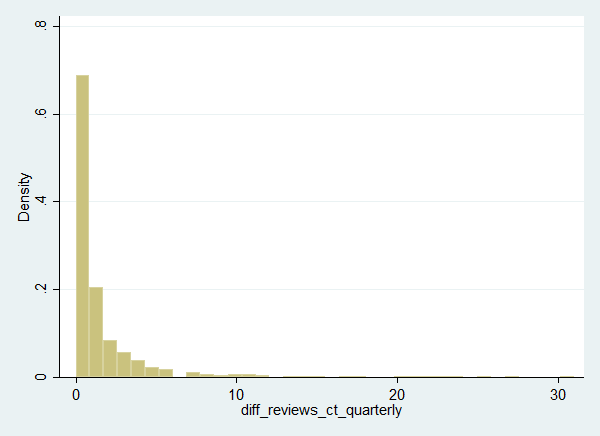

In [44]:
histogram diff_reviews_ct_quarterly

In [45]:
xtset

       panel variable:  installer_id (unbalanced)
        time variable:  year_month_~t, 7 to 64
                delta:  1 unit


In [50]:
su year_month_count if mod(year_month_count,4)==0


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
year_month~t |      1,384    50.16474    10.42032          8         64


In [54]:
global iv_0_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean   log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_11_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean c.ent_others_demean#c.ent_others_demean  log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  
global iv_12_demean "avg_v2_demean missing_avg reviews_ct  avgmean_others_demean  ent_others_demean ent_self_demean  c.ent_others_demean#c.ent_others_demean  c.ent_self_demean#c.ent_self_demean log_experience temp_own_price_diff_other missing_price_info log_zip_rev i.state_n "  

eststo clear 

drop if ent_others_demean==.


qui:areg f.log_quotes  $iv_0_demean  , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes $iv_11_demean    , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_12_demean  , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_0_demean if mod(year_month_count,2)==1 , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes $iv_11_demean if mod(year_month_count,2)==1   , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_12_demean if mod(year_month_count,2)==1 , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_0_demean if mod(year_month_count,4)==1 , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes $iv_11_demean if mod(year_month_count,4)==1   , absorb( installer_id) vce(robust)
eststo
qui:areg f.log_quotes  $iv_12_demean if mod(year_month_count,4)==1 , absorb( installer_id) vce(robust)
eststo

esttab est1 est2 est3 est4 est5 est6 ,  order(  ent_self* c.ent_self* ent_other* c.ent_other* avg_v2_demean avgmean_others_demean) drop(*state* missing* ) p  label  scalars(r2 aic bic)
esttab est1 est2 est3 est7 est8 est9 ,  order(  ent_self* c.ent_self* ent_other* c.ent_other* avg_v2_demean avgmean_others_demean) drop(*state* missing* ) p  label  scalars(r2 aic bic)







(0 observations deleted)


(est1 stored)


(est2 stored)


(est3 stored)


(est4 stored)


(est5 stored)


(est6 stored)


(est7 stored)


(est8 stored)


(est9 stored)


--------------------------------------------------------------------------------------------------------------------
                              (1)             (2)             (3)             (4)             (5)             (6)   
                     F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l    F.Installe~l   
--------------------------------------------------------------------------------------------------------------------
Rating_Entropy_Self                                         0.936*                                          0.956   
                                                          (0.011)                                         (0.085)   

Rating_Entropy_Sel~t                                       -1.301*                                         -1.021   
    